In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image, ImageOps
import pandas as pd
import collections

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

Data loading, normalization, resizing, splitting (for training data) and augmentation.

In [2]:
#Desktop
training_path = r'C:\Users\Andy Guevara\Projects\ECE499_Emotions _Classifier\Emotion_Recognition_Via_MLMethods\Data\AffectNETdataset\Training'
#test_path = r'C:\Users\Andy Guevara\Projects\ECE499_Emotions _Classifier\Emotion_Recognition_Via_MLMethods\Data\AffectNETdataset\Evaluation'

#Laptop
#training_path = r'C:\Users\andyg\Documents\ECE 499 - CV Project\Git\Emotion_Recognition_Via_MLMethods\Data\AffectNETdataset\Training'
#test_path = r'C:\Users\andyg\Documents\ECE 499 - CV Project\Git\Emotion_Recognition_Via_MLMethods\Data\AffectNETdataset\Evaluation'

In [3]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

classes_encoded = {'Anger':0, 'Contempt': 1, 'Disgust':2, 'Fear':3, 'Happy':4, 'Neutral':5, 'Sad':6, 'Surprise':7}

In [4]:
def load_data(path):
    #load data from directory then normalize to [0,1] and resize to (300,120).
    filenames = os.listdir(path)

    labels = []
    data = []

    for label in filenames:
        set_path = path+'\\'+label+'\\'+'Eyes'
        images = os.listdir(set_path)
        images = images[0:int(len(images)/3)]
        lab = classes_encoded[label]

        for image in images:
            img = cv2.imread(set_path+'\\'+image)
            #img = cv2.imread(set_path+'\\'+image, cv2.IMREAD_GRAYSCALE)
            img = NormalizeData(img)
            img = cv2.resize(img, (300,120))
            img = np.asarray(img)
            data.append(img)
            labels.append(lab)
    
    labels = np.asarray(labels)
    data = np.asarray(data)
    
    return labels, data

In [5]:
y_train, X_train = load_data(training_path)
#y_test, X_test = load_data(test_path)

#print(y_test.shape, X_test.shape)
print(y_train.shape, X_train.shape)

(10687,) (10687, 120, 300, 3)


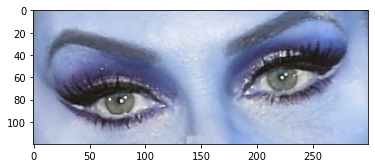

In [6]:
#plt.imshow(X_train[0], cmap='gray')
#plt.imshow(X_train[0], cmap='gray')
plt.imshow(X_train[0])

In [7]:
collections.Counter(y_train)

Counter({0: 1349,
         1: 1119,
         2: 1071,
         3: 1442,
         4: 1460,
         5: 1410,
         6: 1347,
         7: 1489})

In [9]:
max(collections.Counter(y_train).values())

1489

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

Data Augmentation

In [12]:
def aug_data(X, y):
    num_classes = 8
    max_class_count = max(collections.Counter(y).values())
    for j in range(num_classes):
        new_data = []
        new_lab = []
        class_j = X[y==j]
        for i in range(len(X)):
            if (len(class_j)+len(new_data)) < max_class_count:
                aug_img = cv2.flip(class_j[i], 1)
                new_data.append(aug_img)
                new_lab.append(j)
            if (len(class_j)+len(new_data)) == max_class_count:
                break
        if len(new_data) == 0:
            continue
        new_data = np.asarray(new_data)
        new_lab = np.asarray(new_lab)
        #print(X.shape, new_data.shape)
        X = np.vstack((X,new_data))
        y = np.hstack((y, new_lab))

    return X, y

X_train, y_train = aug_data(X_train, y_train)

In [13]:
print(X_train.shape, y_train.shape)

(10736, 120, 300, 3) (10736,)


In [14]:
#Label count of augmented dataset.
collections.Counter(y_train)

Counter({5: 1342,
         0: 1342,
         2: 1342,
         7: 1342,
         6: 1342,
         3: 1342,
         4: 1342,
         1: 1342})

In [ ]:
#save_path = r'C:\Users\andyg\Documents\ECE 499 - CV Project\Git\Emotion_Recognition_Via_MLMethods\Data\AffectNETdataset'
#save_path = r'C:\Users\Andy Guevara\Projects\ECE499_Emotions _Classifier\Emotion_Recognition_Via_MLMethods\Data\Numpy Arrays'
#Lite
save_path = r'C:\Users\Andy Guevara\Projects\ECE499_Emotions _Classifier\Emotion_Recognition_Via_MLMethods\Data\Np Arrays Lite RGB'

np.save(save_path+'\\'+'X_train',X_train)
#np.save(save_path+'\\'+'X_test',X_test)
np.save(save_path+'\\'+'X_val',X_val)
np.save(save_path+'\\'+'y_train',y_train)
#np.save(save_path+'\\'+'y_test',y_test)
np.save(save_path+'\\'+'y_val',y_val)